# **IBM Python Final Assignment**

### **Grading Criteria**

#### You will be graded on the dashboards displaying the specified data and the screenshots you took during the final project lab questions. There are 12 possible points for this assignment. Here is the breakdown:

Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

Question 7 - Sharing your Assignment Notebook - 2 Points

For each problem points will be awarded as follows:
> Full Points: Working code that yields correct results
> 
> Partial Points: Partially correct code or results
>
>  No Points: Did not attempt the problem or did not upload any solution

### **Question 1: Use yfinance to Extract Stock Data**

In [336]:
import yfinance as yf
import pandas as pd
import json

In [338]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [413]:
import re
import numpy as py

In [344]:
tesla = yf.Ticker("TSLA")
tesla

yfinance.Ticker object <TSLA>

In [346]:
type(tesla)

yfinance.ticker.Ticker

In [348]:
tesla_data = tesla.history(period = "max")

In [349]:
tesla_data.reset_index(inplace = True)

In [352]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### **Question 2: Use Webscraping to Extract Tesla Revenue Data**
#### Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [355]:
import requests
from bs4 import BeautifulSoup

In [357]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [444]:
url_t = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

tesla_data = requests.get(url_t).text

In [445]:
tesla_soup = BeautifulSoup(tesla_data, 'html.parser')

In [448]:
tesla_dataframe = pd.read_html(url_t)
tesla_revenue = tesla_dataframe[1]

soup.find("tbody").find_all("tr")

# Change column names
tesla_revenue.columns = ["Date", "Revenue"]

# Remove null or empty strings
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(int)


In [450]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


### **Question 3: Use yfinance to Extract Stock Data**
#### Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.


In [427]:
import yfinance as yf
import pandas as pd
import re

In [398]:
GameStop = yf.Ticker("GME")
GameStop

yfinance.Ticker object <GME>

In [400]:
gme_data = gamestop.history(period = 'max')

In [402]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### **Question 4: Use Webscraping to Extract GME Revenue Data**
Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named html_data_2.

In [404]:
import requests
from bs4 import BeautifulSoup

In [406]:
gme_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [408]:
html_data_2 = requests.get(gme_url).text

In [409]:
# Parsing HTML data

gme_soup = BeautifulSoup(html_data_2, 'html.parser')

#### Using 'BeautifulSoup' or the 'read_html' function extract the table with GameStop Revenue and store it into a dataframe named gme_revenu. The dataframe should have columns 'Date' and 'Revenue'. Make sure the comma and dollar sign is removed from the Revenue column.

In [328]:
gme_revenue = pd.read_html(str(gme_soup), match = "Quarterly Revenue", flavor = "bs4")[0]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue.replace(",","", regex = True, inplace = True)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("\W","", regex = True)
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


### **Question 5: Plot Tesla Stock Graph**

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

In [492]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("int")))
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("int"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

In [494]:
tesla_data = tesla.history(period = "max")

In [496]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

AttributeError: 'DataFrame' object has no attribute 'Date'

### **Question 6: Plot GameStop Stock Graph**

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the make_graph function is make_graph(gme_data, gme_revenue, 'GameStop').

In [464]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = gme_data[gme_data.Date <= '2021-06-14']
    revenue_data_specific = gme_revenue[gme_revenue.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

/var/folders/8q/92fg9bcs1rbfntwpm6mhkv000000gn/T/ipykernel_41894/2555144153.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



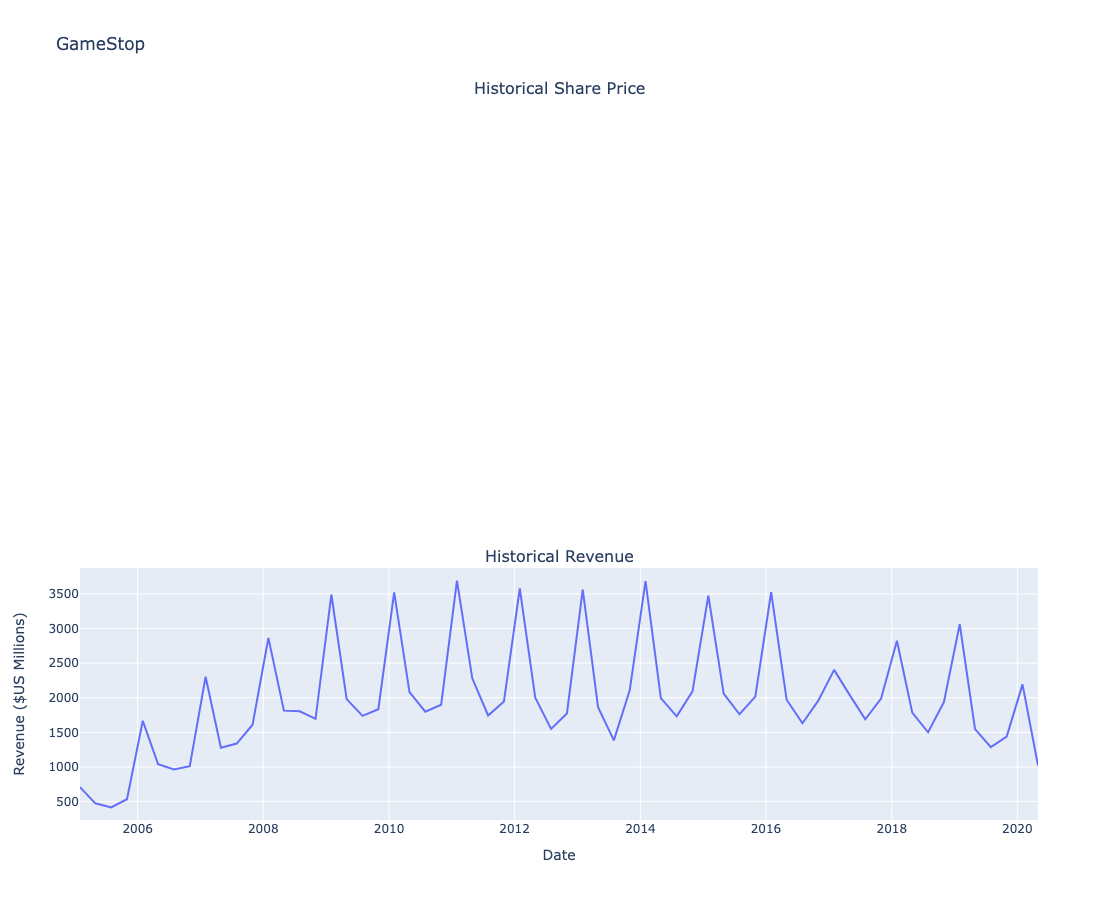

In [466]:
make_graph(gme_data, gme_revenue, 'GameStop')

### Link for lesson submission

https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Final%20Assignment.ipynb

In [1]:
# 1 = corrected. 2 = ok. 4 = ok, 4-6, need work (need to add GitHub Link, which I forgot)